# Tutorial Prático React: Jogo da Velha Multiusuário

## Sobre esse tutorial
* O objetivo deste tutorial é apresentar um Jogo da Velha Multiusuário, com conexão a backend REST e Web Sockets.
* O que será visto:
 * Uso do framework Material-UI
 * Comunicação em tempo real com Socket.io
 * Comunicação com API REST via Axios
 * Gerenciamento de estado compartilhado
 * Uso do easy-peasy para gerenciar estado
 
* Este tutorial é continuação do [tutorial frontend com react - jogo da velha](http://marceloakira.gitlab.io/tutorial/frontend-com-react-jogo-da-velha-slides.html#/) 
* Acompanhe atualizações, colabore ou crie um fork, acessando o [código-fonte](https://gitlab.com/marceloakira/tutorial/tree/master/frontend-com-react) 
* Visualize no formato de apresentação em [slides](http://marceloakira.gitlab.io/tutorial/frontend-com-react-jogo-multiusuario-slides.html#/) 
* Demonstrações da execução deste tutorial são [gravados em vídeo no youtube](https://www.youtube.com/mainuzuka)

# Clonando o projeto anterior

Vamos reaproveitar o código-fonte do [projeto anterior](http://marceloakira.gitlab.io/tutorial/frontend-com-react-jogo-da-velha-slides.html#/): 

```bash
git clone https://gitlab.com/marceloakira/react-tic-tac-toe
mv react-tic-tac-toe react-tic-tac-toe-mp
cd react-tic-tac-toe-mp
yarn
yarn start-storybook
```

# Criando um componente de chat

Para tornar o nosso jogo mais interativo, vamos criar um componente de bate-papo (chat) para os jogadores conversarem. Para construir um novo componente podemos utilizar simples elementos do HTML diretamente ou componentes complexos de alto nível, que na verdade são compostos indiretamente dos elementos HTML básicos. Para a plataforma React, há [vários frameworks](https://www.codeinwp.com/blog/react-ui-component-libraries-frameworks/) que oferecem um conjunto de componentes cheio de funcionalidades. Neste tutorial, usaremos o [Material-UI](https://material-ui.com/) que é bem avaliado no [Github com mais de 51K de estrelas)](https://github.com/mui-org/material-ui) e segue o [Material Design](https://material.io/) - um manual de boas práticas / guidelines de Interface de Usuário produzido pela Google. 

Para [instalar](https://material-ui.com/getting-started/installation/) o Material-UI:
```
yarn add @material-ui/core
yarn add @material-ui/icons
```

```javascript
import React from 'react';
import { storiesOf } from '@storybook/react'
import Square from '../Square'

storiesOf('tictactoe game', module)
  .add('square', () =>  
    <Square
      width='50'
      height='50'
    />
  )
```

Note neste exemplo que o componente _Square_ foi criado passando _props_ _width_ e _height_. Ao inicializar o _Storybook_ com o comando _yarn start-storybook_, obtivemos um simples quadrado cinza de 50 x 50 pixels:

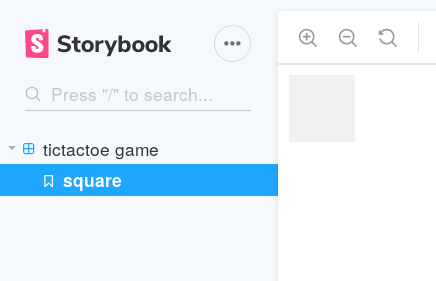

# Repassando o valor do quadradro

Nosso componente precisa de desenhar um 'X' ou 'O' toda vez que um valor for a ele atribuído. A forma mais simples é através de uma _prop_ que vamos chamar de _value_. No arquivo _index.stories.js_ você já pode adiantar a passagem desse valor:
```javascript
import React from 'react';
import { storiesOf } from '@storybook/react'
import Square from '../Square'

storiesOf('tictactoe game', module)
  .add('square', () =>  
    <Square
      width='50'
      height='50'
      value='o'     
    />
  )
```

# Desenhando o valor do quadrado

Em que situações o componete _Square_ deve ser (re)desenhado? A resposta está relacionada a _prop value_, quando essa for alterada, o desenho do quadrado deverá ser atualizado. No React, isso é chamado de 'efeito colateral' ou simplesmente 'efeito' do componente, que consiste em um evento de atualização visual do DOM quando houver alguma alteração de dados. Para tratar efeitos, o hook de efeito [useEffect](https://pt-br.reactjs.org/docs/hooks-effect.html) é utilizado. Atualize o código-fonte do componente Square:

Código completo do componente _Square_:

```javascript
import React, { useEffect, useRef } from 'react'

function Square(props) { 
  
  const canvasRef = useRef()

  useEffect(() => {
    const ctx = canvasRef.current.getContext('2d')
    ctx.font = '25px arial'
    if ( props.value === 'x' ) {
      ctx.fillText('X', 15, 30)
    }
    else if ( props.value === 'o' ) {
      ctx.fillText('O', 15, 30)
    }  
  }, [props.value])

  return(
    <canvas
      ref={canvasRef}
      height={props.height}
      width={props.width}
      style={{backgroundColor: '#f1f1f1'}}
    />
  )
}

export default Square
```

# Detalhes sobre o _useEffect_

O _useEffect_ possui a seguinte sintaxe:

```javascript
useEffect(
    funcao_de_callback,
    [var1, var2, ..., varN]
)
```
Onde:
* __funcao_de_callback__: será executada toda vez que uma das variáveis for alterada. No nosso caso, utilizamos uma _arrow function_. 
* __[var1, var2, ..., varN]__: vetor de variáveis monitoradas, qualquer alteração em uma delas dispara a _funçao_de_callback_. No nosso caso, somente a variável _props.value_ é monitorada. 

As funções do tipo [hook tem algumas regras](https://pt-br.reactjs.org/docs/hooks-rules.html) que são obrigatórias:
* __Devem ser utilizadas somente no nível superior__: não podem rodar dentro de loops ou 'ifs', ou aninhadas dentro de outras funções.
* __Devem ser definidos somente dentro de componentes React ou em [hooks customizados](https://pt-br.reactjs.org/docs/hooks-rules.html)__.

# Detalhes sobre o _useRef_

O _useRef_ é um hook que permite gerar uma referência a um componente:

```javascript
  const canvasRef = useRef()
```

A constante _canvasRef_ foi depois utilizada na _prop ref_ do componente _canvas_:
```
    <canvas>
      ref={canvasRef}
      ...
    </canvas>
```

Com isso, pode-se obter o [Contexto 2D](https://developer.mozilla.org/en-US/docs/Web/API/CanvasRenderingContext2D) através da referência

```javascript
   useEffect(() => {
       ...
       const ctx = canvasRef.current.getContext('2d')
       ...
   }, [props.value])
```


Por meio do contexto 2D é possível alterar fonte (_ctx.font_) e desenhar um texto (ctx.fillText).

# Testando o componente _Square_:

O componente _Square_ agora renderiza um 'o':

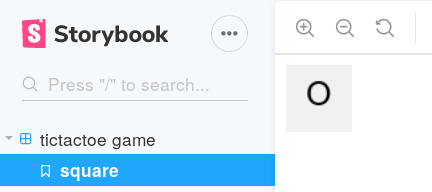

Experimente alterar o valor da _prop.value_ para testar o 'x'.

#  Desenvolvimento do _Board_ (tabuleiro)

Vamos agora criar o arquivo _Board.js_ que através da composição de vários _Squares_ (quadrados), formar um tabuleiro de Jogo da Velha. Crie esse arquivo na pasta _src_, com o seguinte código inicial:

```javascript
import React from 'react'
import Square from './Square'
export default function Board(props) {
  const renderSquare = (i) => <Square 
        value={props.squares[i]}
        width='50'
        height='50'
        id={i}
      />;
  return(
    <div>
        <div>
          {renderSquare(0)}
          {renderSquare(1)}
          {renderSquare(2)}
        </div>
        <div>
          {renderSquare(3)}
          {renderSquare(4)}
          {renderSquare(5)}
        </div>
        <div>
          {renderSquare(6)}
          {renderSquare(7)}
          {renderSquare(8)}
        </div>      
    </div>
  )
}
```

# Explicando o componente _Board_ 

Em React é comum criar funções geradoras de componentes:
```javascript
  const renderSquare = (i) => <Square 
        value={props.squares[i]}
        width='50'
        height='50'
        id={i}
      />;
```
A função _renderSquare_ recebe um parâmetro 'i' e retorna um componente _Square_, com o valor do quadrado (null, 'x' ou 'o') através de _props_. A _array squares_ será obrigatória e fornecida como propriedade _props_ do componente _Board_. Cada componente _Square_ receberá uma _prop id_ com o valor da sua posição, que vai de 0 a 8. O componente _Board_ é formado por um componente _div_ raiz que possui 3 componentes _div_ que formarão as linhas, sendo que cada linha possui 3 componentes _Square_, renderizados através da função _renderSquare_. Assim formaremos um tabuleiro de 3x3 quadrados do jogo da velha.

```html
   ...
   <div> <!-- componente raiz -->
       <div> <!-- primeira linha -->
           {renderSquare(0)}
           {renderSquare(1)}
           {renderSquare(2)}
       </div>
       <div>
       ... <!-- segunda linha -->
       </div>
       <div>
       ... <!-- terceira linha -->
       </div>
   </div>
   ...

```

# Testando o componente _Board_

Para visualizar o componente _Board_ é necessário adicionar uma história no _Storybook_, bem como inicializá-lo com uma _array_ preenchida com _nulls_ na prop _squares_:

```javascript
// ... imports
import Board from '../Board'

storiesOf('tictactoe game', module)
  .add('square', () =>  
    // ... componente _Square_
  )
  .add('board', () =>  
    <Board      
      squares={
        ['x', null, 'o', 
        'o', 'x', null, 
        null, null, 'x']} 
    />
  )  
```


# Visualização do componente _Board_:

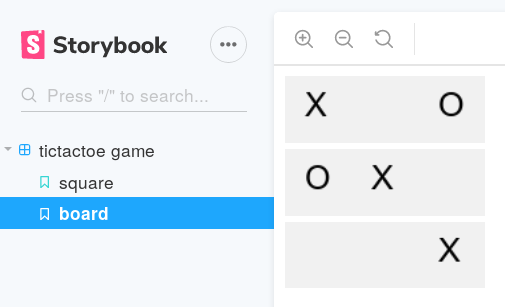

Note que as 3 linhas do tabuleiro apareceram, mas os quadrados de cada linha ficaram colados um com o outro, sem separação de colunas. Uma das possíveis soluções para esse problema é utilizar estilização de componentes, vamos reaproveitar o arquivo CSS do [tutorial oficial do React](https://codepen.io/gaearon/pen/ybbQJX?editors=0100) e salvá-lo em um arquivo _Game.css_:

Código-fonte do CSS:

```html
body {
  font: 14px "Century Gothic", Futura, sans-serif;
  margin: 20px;
}

ol, ul {
  padding-left: 30px;
}

.board-row:after {
  clear: both;
  content: "";
  display: table;
}

.status {
  margin-bottom: 10px;
}

.square {
  background: #fff;
  border: 1px solid #999;
  float: left;
  font-size: 24px;
  font-weight: bold;
  line-height: 34px;
  height: 34px;
  margin-right: -1px;
  margin-top: -1px;
  padding: 0;
  text-align: center;
  width: 34px;
}
```

# Estilização dos componentes

Para aplicar estilização nos componentes _Board_ e _Square_, é necessário importar o arquivo CSS no componente através da sentença _import_ e depois atribuir o nome da classe através da prop _className_:

Estilização do componente _Board_:
```html
// ... imports
import './Game.css'

// utilizando a classe nas div's de linha
<div className="board-row">
    // renderiza quadrados
</div>

```

Estilização do componente _Square_:
```html
// ... imports
import './Game.css'

// utilizando a classe nas div's de linha
<canvas>
    className="square"
    // outras props
</canvas>

```

# Componentes estilizados com CSS

E assim ficou a aparência do componente _Board_:

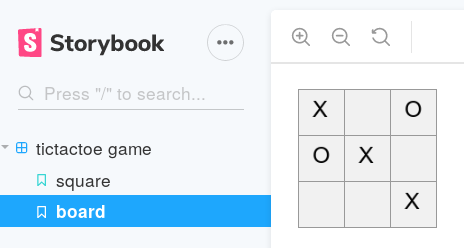

# Tratando o evento de _click_

O componente _canvas_ é o único que suporta eventos de _click_. Podemos criar uma função _handleClick_ e referenciá-lo na props _onClick_.

```javascript
// ... no componente Square
const handleClick = () => {
    alert('click from Square of id: '+props.id)
}
// outras funções: useEffect...
// ... no componente canvas
return (
    <canvas
        onClick={handleClick}
        // ... outras props
    />
```



Ao clicar em qualquer um dos quadrados, irá aparecer uma janela de alerta:

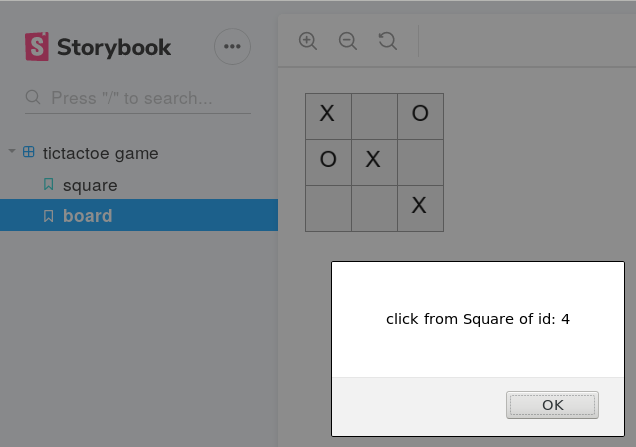

Neste caso, eu cliquei na célula 4 (a mais central).

# Criando e monstrando a vez do jogador

No jogo da velha, cada jogador reveza sua vez de forma alternada. Geralmente o jogador identificado como 'x' é o primeiro a jogar e o jogador 'o' joga em sequência, assim alternadamente até acabar. Componentes podem armazenar dados em variáveis e assim controlar o seu estado (_state_). No nosso caso, o componente _Board_ é que terá os estados _player_ (que conterá o jogador da vez) e _status_ (que armazenará a mensagem de status do jogo). Vamos usar o _hook_ _setState_ para isso:   

```javascript
// ... imports

function Board(props) {
    const [ player, setPlayer ] = useState('x')
    const [ status, setStatus ] = useState('Next player: '+player)
    ...
    return(
        <div> <!-- div raiz -->
            <div className="status">
                {status}
            </div>
            <!-- outras div's -->
        </div>
    )
```



Assim fica o nosso componente _Board_, que informa a vez:

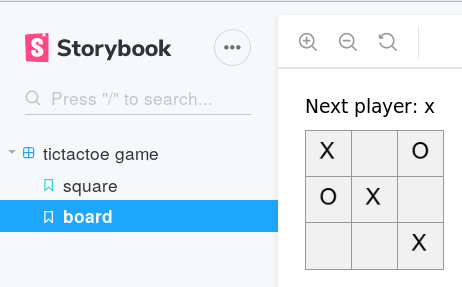

# Controlando a vez do jogador

Note que o evento _click_ foi tratado no componente _Square_, mas o componente _Board_ é quem controla o _status_ e o turno (_player_). Como fazer com que os estados sejam controlados de forma compartilhada e coesa?

A solução mais simples é o componente pai (_Board_) repassar uma função _handleClick_ para o componente filho (_Square_) via _prop_. Assim, quando ocorrer um evento _click_ no _Square_, ele pode invocar a função _handleClick_ do componente pai, informando sua identificação (_id_):

O componente _Board_ pode ter um _handleClick_ próprio e repassar essa função para o componente filho _Square_:
```javascript
// ... imports
function Board(props) {
    // ...
    const handleClick = (id) => {
        props.squares[id] = player
        player === 'x'? setPlayer('o') : setPlayer('x')
        console.log('squares: '+props.squares)
    }
    // ...
    const renderSquare = (i) => <Square
        // ... outras props
        handleClick={handleClick}
    />;

```

Modificação do componente _Square_ para invocar o _handleClick_ do componente pai: 
```javascript
// ..
function Square(props) {
    // ...
    const handleClick = () => {
        // alert('click from Square of id: '+props.id)
        props.handleClick(props.id)
    }
    // ...
}
```

# Testando o componente _Board_

Analise a função _handleClick_ do componente _Board_: 

```javascript
    ...
    const handleClick = (id) => {
        props.squares[id] = player
        player === 'x'? setPlayer('o') : setPlayer('x')
        console.log('squares: '+props.squares)
    }
```

O valor da array _squares_ na posição _id_ é modificada com o valor de estado _player_. A variável de estado _player_ é chaveada conforme o valor atual da mesma, se o valor for 'x', então o valor é alterado para 'o', caso contrário mantém o valor de 'x'. Veja o resultado dos testes:



Note que não há checagem se o quadradro já tinha sido marcado ou não, assim em algumas células, se encontram simultaneamente dois valores, o que é uma inconsistência a ser corrigida. O resultado da visualização da array _squares_ pode ser visualizada na console do _Developer Tools_ do navegador, geralmente disponibilizado com a combinação de teclas CLTR+SHIFT+I: 



# Bloqueando jogadas inconsistentes 

Vamos implementar algumas regras no jogo:
* 1 - __Todas células do jogo devem ser inicialmente vazias:__ inicializar a array _squares_ com valor _null_.
* 2 - __Cada célula deve suportar somente uma única jogada:__ no evento _handleClick_, podemos somente aplicar uma mudança de estado se o valor da célula tem valor _null_
* 3 - __O número máximo de jogadas deve ser limitada a 8:__ criaremos uma variável de estado _round_ que deve ser menor que 9 para permitir alguma mudança de estado.
* 4 - __Quando um jogador vencer, não é mais permitido jogar:__ criaremos uma variável de estado _winner_ que será inicialmente nula e com ajuda da função _calculateWinner_ do tutorial do React, verificaremos se houve algum vencedor a cada jogada.

Inicializando a propriedade _squares_ do componente _Board_ com uma array de _nulls_:

```javascript
.add('board', () => 
    <Board
      squares={
        [null, null, null, 
        null, null, null, 
        null, null, null]} 
    />)
```

Essa alteração é realizada no arquivo _index.stories.js_

Adicionar os estados [_winner_](https://pt-br.reactjs.org/tutorial/tutorial.html?no-cache=1#declaring-a-winner) e _round_:
```javascript
// ...
  const [ winner, setWinner ] = useState(null)
  const [ round, setRound ] = useState(0)
```

Alterar a função _handleClick_:
```javascript
// ...
const handleClick = (id) => {
    if ( ! props.squares[id] && ! winner && round < 9) {
      props.squares[id] = player
      setWinner(calculateWinner(props.squares))
      if (! winner) {
        player === 'x'? setPlayer('o') : setPlayer('x')
        setRound(round+1)
      }
    }    
}
```

Adicionar a função [_calculateWinner_](https://pt-br.reactjs.org/tutorial/tutorial.html?no-cache=1#declaring-a-winner):
```javascript
// adicionar a função calculateWinner:
  const calculateWinner = (squares) => {
    const lines = [
      [0, 1, 2],
      [3, 4, 5],
      [6, 7, 8],
      [0, 3, 6],
      [1, 4, 7],
      [2, 5, 8],
      [0, 4, 8],
      [2, 4, 6],
    ];
    for (let i = 0; i < lines.length; i++) {
      const [a, b, c] = lines[i];
      if (squares[a] && squares[a] === squares[b] && squares[a] === squares[c]) {
        return squares[a];
      }
    }
    return null;
  }
```

# Atualização do status

O _status_ é importante pois ele informa resultados parciais ou finais do jogo. Temos que responder algumas perguntas:
* __1 - Quando atualizar o status?:__ deve ser atualizado quando alguma variável de estado (_player_, _winner_ ou _round_) for alterada.
* __2 - Quais são os status possíveis?:__ o jogo pode estar em andamento e neste caso deve ser informado a vez do jogador 'O' ou 'X'. Caso tenha terminado, o jogo pode ter empatado ou algum jogador declarado como vencedor.
* __3 - O que o React proporciona para tratar mudança de estado?:__ o _hook_ _useEffect_ é o recomendado para esse fim, podemos passar uma lista de variáveis a serem monitoradas e qualquer mudança em uma delas, a função passada como argumento é executada.

O código-fonte que controla o status é esse:
```javascript
// ... outros imports 
import React, { useState, useEffect } from 'react'

// ... outras funções
  useEffect(() => {
    if (! winner) {
      if (round === 9)
        setStatus('The game tied')
      else
        setStatus('Next player: '+player)
    }
    else
      setStatus(winner+' won the game!')
  },[player, winner, round])
// ...outras partes de código
```

# Testando o jogo da velha

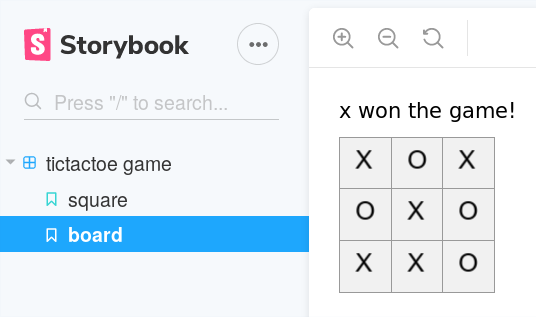

O jogo da velha básico, que roda localmente foi completado. O código-fonte completo foi publicado neste [link](https://gitlab.com/marceloakira/tutorial/tree/master/frontend-com-react/tic-tac-toe-with-hooks).


# Distribuindo a aplicação (deploy)

Para criar um modelo (template) de aplicação React, utilizamos a ferramenta _create-react-app_. Essa ferramenta cria vários arquivos modelo:
* __App.js__: aplicação modelo, disponível na pasta _src_. É através deste arquivo é que você definirá o(s) componente(s) padrões.
* __index.html__: arquivo modelo HTML, disponível na pasta _public_. É este arquivo que possui uma 'div' identificada como _root_ que servirá de componente raiz para montar dinamicamente os componentes raiz.

Tem outros arquivos extras na pasta _public_ como _logo192.png_, _logo512.png_, favicon.ico, manifest.json e robots.txt que [podem ser removidos ou alterados](https://hackernoon.com/create-react-app-is-way-too-bloated-5db07c3511), afim de criar um distribuição mais enxuta.

Para distribuir uma aplicação, altere o arquivo _App.js_:
```javascript
import React from 'react';
import Board from './Board';

function App() {
  return (
      <Board      
        squares={[ null, null, null, 
          null, null, null, 
          null, null, null
        ]}
      />
  );
}
export default App;
```

Para construir (build) a aplicação, execute:

```
yarn build
```

Depois disso, sua aplicação vai estar disponível na pasta _build_ do seu projeto.

# Executando a aplicação

Para executar a aplicação construída na pasta _build_, você pode executar o script _serve_ instalado pelo _yarn:

```
yarn add serve
```

E para executar a aplicação, basta executar o comando:

```
yarn serve -s build
```

Por padrão, a sua aplicação vai estar disponível no endereço http://localhost:5000 que pode ser aberto no navegador:

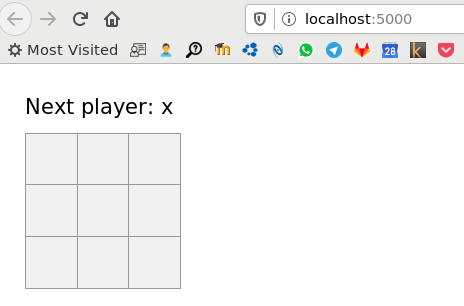

# Exercícios

1. Altere o arquivo _index.stories.js_ e crie novas histórias para os componentes _Square_ e _Board_.

2. Desenvolva uma nova implamentação de _Square_, utilizando o componente _button_ ao invés do _canvas_. Analise quais são as desvantagens e desvantagens. 

3. Altere a implementação do _Square_ para utilizar uma imagem que representa cada jogador em vez dos tradicionais 'X' e 'O'. 

4. Crie um [jogo de memória](https://rachacuca.com.br/passatempos/jogo-da-memoria/) que consiste em achar pares de imagens iguais em um conjunto de cartas com a frente virada, sendo que é permitido virar no máximo duas cartaz por vez.